In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-prices-2015-2025/nflx_prices.csv
/kaggle/input/netflix-prices-2015-2025/nflx_prices.csv


The point of this is to essentially answer the question "How risky has Netflix been recently?"

In [2]:
import pandas as pd
import numpy as np

prices = pd.read_csv("/kaggle/input/netflix-prices-2015-2025/nflx_prices.csv")
prices.head()

,Date,Price,Return
0,2015-01-02,4.984857,NaN
1,2015-01-05,4.731143,-0.050897
2,2015-01-06,4.650143,-0.017121
3,2015-01-07,4.674286,0.005192
4,2015-01-08,4.778000,0.022188


In [3]:
window = 20

prices['Realized_Vol'] = (
    prices['Return']
    .rolling(window)
    .std()
    * np.sqrt(252)
)

In [4]:
prices[['Return', 'Realized_Vol']].tail(30)

,Return,Realized_Vol
2733,-0.002825,0.427116
2734,-0.036440,0.441432
2735,-0.008335,0.420499
2736,0.034455,0.443227
2737,-0.035849,0.287819
2738,-0.039364,0.319121
2739,-0.012870,0.316966
2740,0.025501,0.331912
2741,-0.024025,0.340140
2742,0.016667,0.346895


<Axes: title={'center': 'NFLX Realized Volatility (20-day)'}>

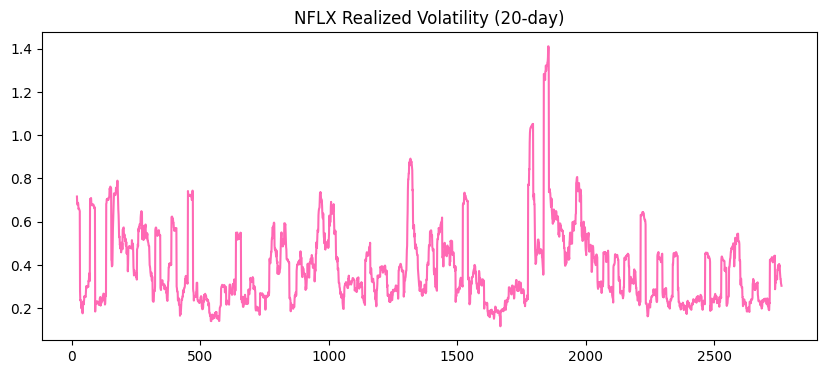

In [5]:
prices['Realized_Vol'].plot(
    title="NFLX Realized Volatility (20-day)",
    figsize=(10,4),
    color='hotpink'
)

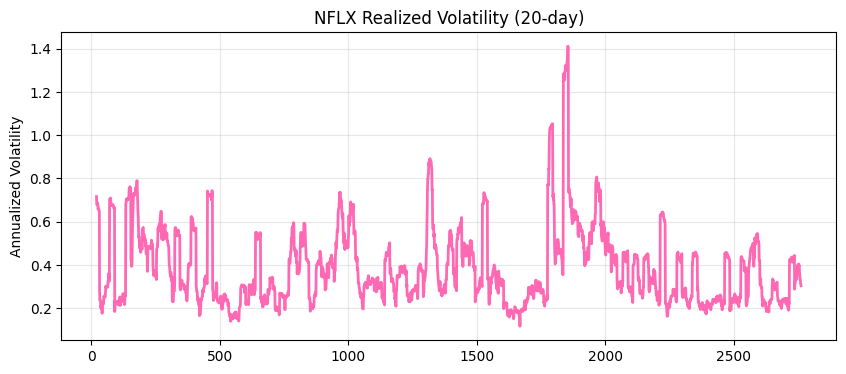

In [6]:
import matplotlib.pyplot as plt

prices['Realized_Vol'].plot(
    figsize=(10, 4),
    color='hotpink',
    linewidth=2
)

plt.title("NFLX Realized Volatility (20-day)", fontsize=12)
plt.ylabel("Annualized Volatility")
plt.grid(alpha=0.3)
plt.show()

This part answers whether Netflix is an uptrend right now?

In [7]:
ma_window = 50

prices['ma_50'] = prices['Price'].rolling(ma_window).mean()

In [8]:
#Hoping to get 1 for long and 0 for flat
prices['Signal'] = (prices['Price'] > prices['ma_50']).astype(int)

In [9]:
prices[['Price', 'ma_50', 'Signal']].tail(30)

,Price,ma_50,Signal
2733,115.422997,117.65786,0
2734,111.217003,117.39456,0
2735,110.290001,117.11084,0
2736,114.089996,116.86614,0
2737,110.000000,116.57072,0
2738,105.669998,116.27712,0
2739,104.309998,115.98644,0
2740,106.970001,115.72132,0
2741,104.400002,115.40830,0
2742,106.139999,115.07410,0


In [10]:
prices['Signal'].unique()

array([0, 1])

In [11]:
prices['Signal'].value_counts()

Signal
1    1779
0     984
Name: count, dtype: int64

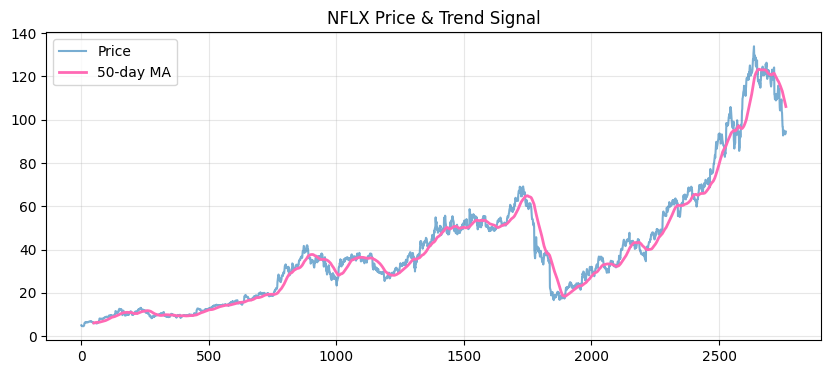

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(prices.index, prices['Price'], label='Price', alpha=0.6)
plt.plot(prices.index, prices['ma_50'], label='50-day MA', color='hotpink', linewidth=2)

plt.title("NFLX Price & Trend Signal")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

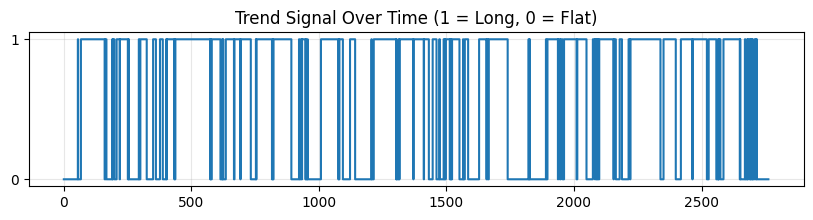

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
plt.plot(prices.index, prices['Signal'], drawstyle='steps-post')
plt.title("Trend Signal Over Time (1 = Long, 0 = Flat)")
plt.yticks([0, 1])
plt.grid(alpha=0.3)
plt.show()

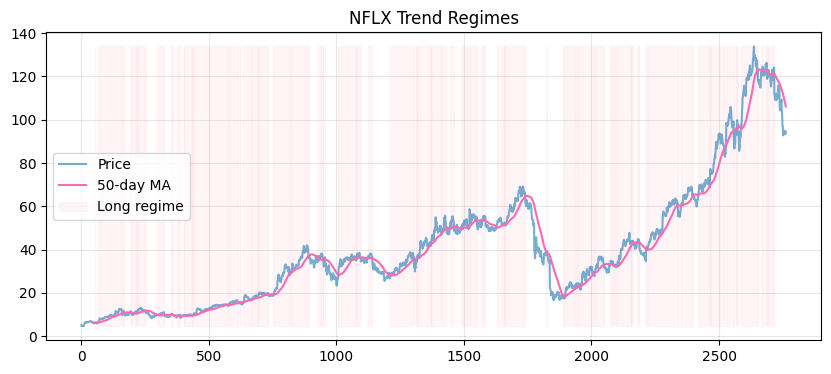

In [14]:
plt.figure(figsize=(10,4))
plt.plot(prices.index, prices['Price'], label='Price', alpha=0.6)
plt.plot(prices.index, prices['ma_50'], label='50-day MA', color='hotpink')

plt.fill_between(
    prices.index,
    prices['Price'].min(),
    prices['Price'].max(),
    where=prices['Signal'] == 1,
    color='pink',
    alpha=0.15,
    label='Long regime'
)

plt.title("NFLX Trend Regimes")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

For better visualisation of Signal

In [15]:
time_in_market = prices['Signal'].mean()
time_in_market

np.float64(0.6438653637350705)

In [16]:
regime_change = prices['Signal'].diff().fillna(0).abs()
regime_id = regime_change.cumsum()

prices['regime_id'] = regime_id

In [17]:
regime_lengths = (
    prices
    .groupby(['regime_id', 'Signal'])
    .size()
    .reset_index(name='days')
)

In [18]:
regime_lengths.groupby('Signal')['days'].describe()

,count,mean,std,min,25%,50%,75%,max
Signal,,,,,,,,
0,91.0,10.813187,16.120320,1.0,1.00,3.0,12.50,82.0
1,90.0,19.766667,27.905559,1.0,1.25,5.0,29.75,137.0


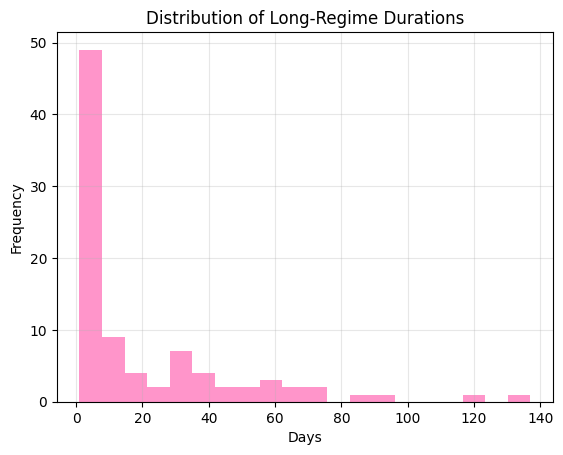

In [19]:
import matplotlib.pyplot as plt

long_regimes = regime_lengths[regime_lengths['Signal'] == 1]['days']

plt.hist(long_regimes, bins=20, color='hotpink', alpha=0.7)
plt.title("Distribution of Long-Regime Durations")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Using the next to decide how big my position should be on a given day. The goal is to size my position so the risk stays constant. 

Position = (Target Volatility/Realized Volatility)*Signal

In [20]:
#lets assume
target_vol = 0.10

In [21]:
#the formula
prices['Raw_Position'] = (
    target_vol / prices['Realized_Vol']
) * prices['Signal']

In [22]:
prices['Raw_Position'].isna().sum()

np.int64(20)

In [23]:
prices['Position'] = prices['Raw_Position'].fillna(0)

In [24]:
prices[['Signal', 'Realized_Vol', 'Position']].tail(20)

,Signal,Realized_Vol,Position
2743,0,0.349244,0.0
2744,0,0.338394,0.0
2745,0,0.333332,0.0
2746,0,0.376113,0.0
2747,0,0.375473,0.0
2748,0,0.386567,0.0
2749,0,0.398808,0.0
2750,0,0.391617,0.0
2751,0,0.400891,0.0
2752,0,0.397666,0.0


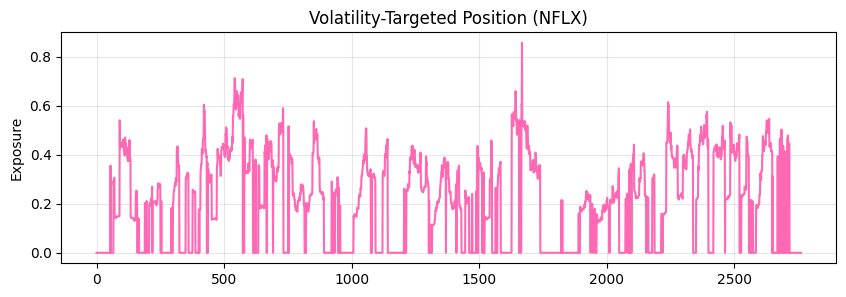

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(prices.index, prices['Position'], color='hotpink')
plt.title("Volatility-Targeted Position (NFLX)")
plt.ylabel("Exposure")
plt.grid(alpha=0.3)
plt.show()

Now moving to actual PnL calculation

In [26]:
#To avoid look ahead bias
prices['Position_lag'] = prices['Position'].shift(1)

In [27]:
#Daily PnL
prices['PnL'] = prices['Position_lag'] * prices['Return']
prices['PnL'] = prices['PnL'].fillna(0)

In [28]:
prices[['Position', 'Position_lag', 'Return', 'PnL']].tail(20)

,Position,Position_lag,Return,PnL
2743,0.0,0.0,0.013567,0.0
2744,0.0,0.0,0.014408,0.0
2745,0.0,0.0,0.002016,0.0
2746,0.0,0.0,-0.049291,-0.0
2747,0.0,0.0,-0.007118,-0.0
2748,0.0,0.0,-0.028870,-0.0
2749,0.0,0.0,-0.034417,-0.0
2750,0.0,0.0,-0.000827,-0.0
2751,0.0,0.0,-0.041361,-0.0
2752,0.0,0.0,0.014885,0.0


In [29]:
#Cumulative PnL
prices['cumu_PnL'] = prices['PnL'].cumsum()

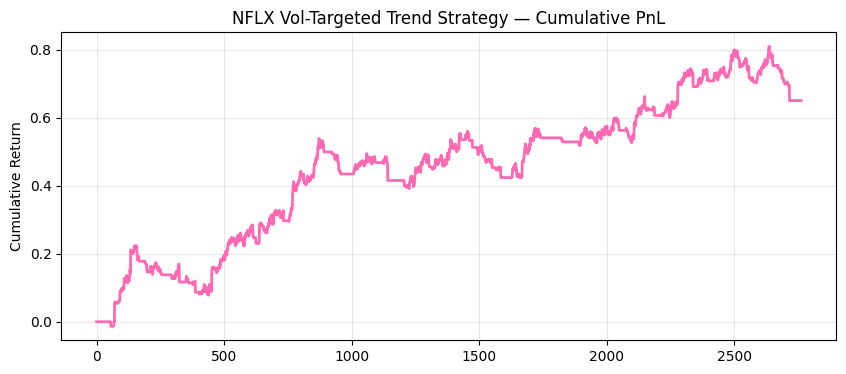

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(prices.index, prices['cumu_PnL'], color='hotpink', linewidth=2)
plt.title("NFLX Vol-Targeted Trend Strategy — Cumulative PnL")
plt.ylabel("Cumulative Return")
plt.grid(alpha=0.3)
plt.show()